# Project: Wrangling and Analyze Data

In [5]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_colwidth", 30)
pd.set_option("precision", 2)


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
with requests.Session() as s:
    download = s.get("https://d17h27t6h515a5.cloudfront.net/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
    content = download.content
img_predictions = pd.read_csv(content)

In [3]:
img_predictions = pd.read_csv("image-predictions.tsv", delimiter="\t")


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
with open("tweet-json.txt", "r") as file:
    data = file.readlines()

tweet_json = {"tweet_id": [], "retweet_count": [], "favorite_count": []}
for x in data:
    formatted_tweet = json.loads(x)
    tweet_json["tweet_id"].append(formatted_tweet["id"])
    tweet_json["retweet_count"].append(formatted_tweet["retweet_count"])
    tweet_json["favorite_count"].append(formatted_tweet["favorite_count"])

tweet_json_df = pd.DataFrame(tweet_json)


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
twitter_archive_enhanced.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.co...",I present to you... Dog Je...,NaN,NaN,NaN,https://twitter.com/dog_ra...,13,10,None,None,None,None,None
2143,669970042633789440,NaN,NaN,2015-11-26 20:04:40 +0000,"<a href=""http://twitter.co...",This is Julio. He was one ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,10,10,Julio,None,None,None,None
824,769940425801170949,NaN,NaN,2016-08-28 16:51:16 +0000,"<a href=""http://twitter.co...",This is Klein. These pics ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,12,10,Klein,None,None,None,None
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02 +0000,"<a href=""http://twitter.co...",HI. MY. NAME. IS. BOOMER. ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,13,10,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.co...",Here's a brigade of pupper...,NaN,NaN,NaN,https://twitter.com/dog_ra...,80,80,None,None,None,None,None


In [10]:
twitter_archive_enhanced.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.co...",This is Phineas. He's a my...,NaN,NaN,NaN,https://twitter.com/dog_ra...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.co...",This is Tilly. She's just ...,NaN,NaN,NaN,https://twitter.com/dog_ra...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.co...",This is Archie. He is a ra...,NaN,NaN,NaN,https://twitter.com/dog_ra...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.co...",This is Darla. She commenc...,NaN,NaN,NaN,https://twitter.com/dog_ra...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.co...",This is Franklin. He would...,NaN,NaN,NaN,https://twitter.com/dog_ra...,12,10,Franklin,None,None,None,None


In [11]:
twitter_archive_enhanced.shape


(2356, 17)

In [12]:
twitter_archive_enhanced.dtypes


tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [13]:
twitter_archive_enhanced.columns


Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [6]:
twitter_archive_enhanced.duplicated().sum()

0

In [15]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
(twitter_archive_enhanced.isna().sum()/twitter_archive_enhanced.shape[0])


tweet_id                      0.00
in_reply_to_status_id         0.97
in_reply_to_user_id           0.97
timestamp                     0.00
source                        0.00
text                          0.00
retweeted_status_id           0.92
retweeted_status_user_id      0.92
retweeted_status_timestamp    0.92
expanded_urls                 0.03
rating_numerator              0.00
rating_denominator            0.00
name                          0.00
doggo                         0.00
floofer                       0.00
pupper                        0.00
puppo                         0.00
dtype: float64

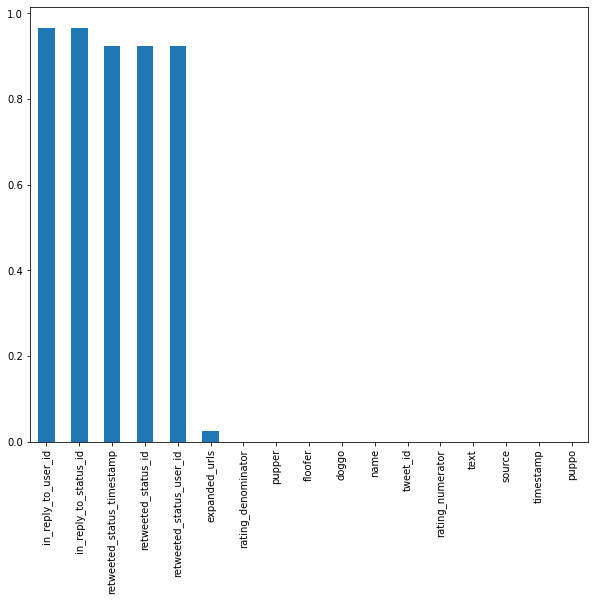

In [23]:
plt.figure(figsize=(10, 8))
(twitter_archive_enhanced.isna().sum()/twitter_archive_enhanced.shape[0]).sort_values(ascending=False).plot.bar();


In [24]:
twitter_archive_enhanced.describe()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.36e+03,7.80e+01,7.80e+01,1.81e+02,1.81e+02,2356.00,2356.00
mean,7.43e+17,7.46e+17,2.01e+16,7.72e+17,1.24e+16,13.13,10.46
std,6.86e+16,7.58e+16,1.25e+17,6.24e+16,9.60e+16,45.88,6.75
min,6.66e+17,6.66e+17,1.19e+07,6.66e+17,7.83e+05,0.00,0.00
25%,6.78e+17,6.76e+17,3.09e+08,7.19e+17,4.20e+09,10.00,10.00
50%,7.20e+17,7.04e+17,4.20e+09,7.80e+17,4.20e+09,11.00,10.00
75%,7.99e+17,8.26e+17,4.20e+09,8.20e+17,4.20e+09,12.00,10.00
max,8.92e+17,8.86e+17,8.41e+17,8.87e+17,7.87e+17,1776.00,170.00


In [25]:
twitter_archive_enhanced.describe(include="object")


,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2016-11-27 19:09:28 +0000,"<a href=""http://twitter.co...",Neat dog. Lots of spikes. ...,2016-08-11 20:40:41 +0000,https://twitter.com/dog_ra...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [26]:
twitter_archive_enhanced["pupper"].unique()


array(['None', 'pupper'], dtype=object)

In [27]:
img_predictions.tail()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/medi...,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/medi...,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/medi...,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/medi...,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True
2074,892420643555336193,https://pbs.twimg.com/medi...,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False


In [28]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
img_predictions.describe()


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.08e+03,2075.00,2075.00,2.08e+03,2.08e+03
mean,7.38e+17,1.20,0.59,1.35e-01,6.03e-02
std,6.79e+16,0.56,0.27,1.01e-01,5.09e-02
min,6.66e+17,1.00,0.04,1.01e-08,1.74e-10
25%,6.76e+17,1.00,0.36,5.39e-02,1.62e-02
50%,7.12e+17,1.00,0.59,1.18e-01,4.94e-02
75%,7.93e+17,1.00,0.84,1.96e-01,9.18e-02
max,8.92e+17,4.00,1.00,4.88e-01,2.73e-01


In [30]:
img_predictions.sort_values(by="p1_conf")[
    ["p1", "p1_conf", "p1_dog"]].query("p1_dog == True")


,p1,p1_conf,p1_dog
38,Ibizan_hound,0.04,True
136,basenji,0.06,True
250,Shetland_sheepdog,0.07,True
680,miniature_pinscher,0.07,True
109,malamute,0.09,True
...,...,...,...
1014,chow,1.00,True
475,chow,1.00,True
865,Labrador_retriever,1.00,True
1372,chow,1.00,True


In [31]:
img_predictions.sort_values(by="p2_conf")[
    ["p2", "p2_conf", "p2_dog"]].query("p2_dog == True")

,p2,p2_conf,p2_dog
1299,Labrador_retriever,1.00e-05,True
1229,basset,1.45e-05,True
1372,Tibetan_mastiff,2.34e-05,True
1796,Tibetan_terrier,4.63e-05,True
1455,Norwich_terrier,5.64e-05,True
...,...,...,...
2065,Cardigan,4.51e-01,True
101,English_setter,4.51e-01,True
72,Labrador_retriever,4.55e-01,True
1514,keeshond,4.65e-01,True


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


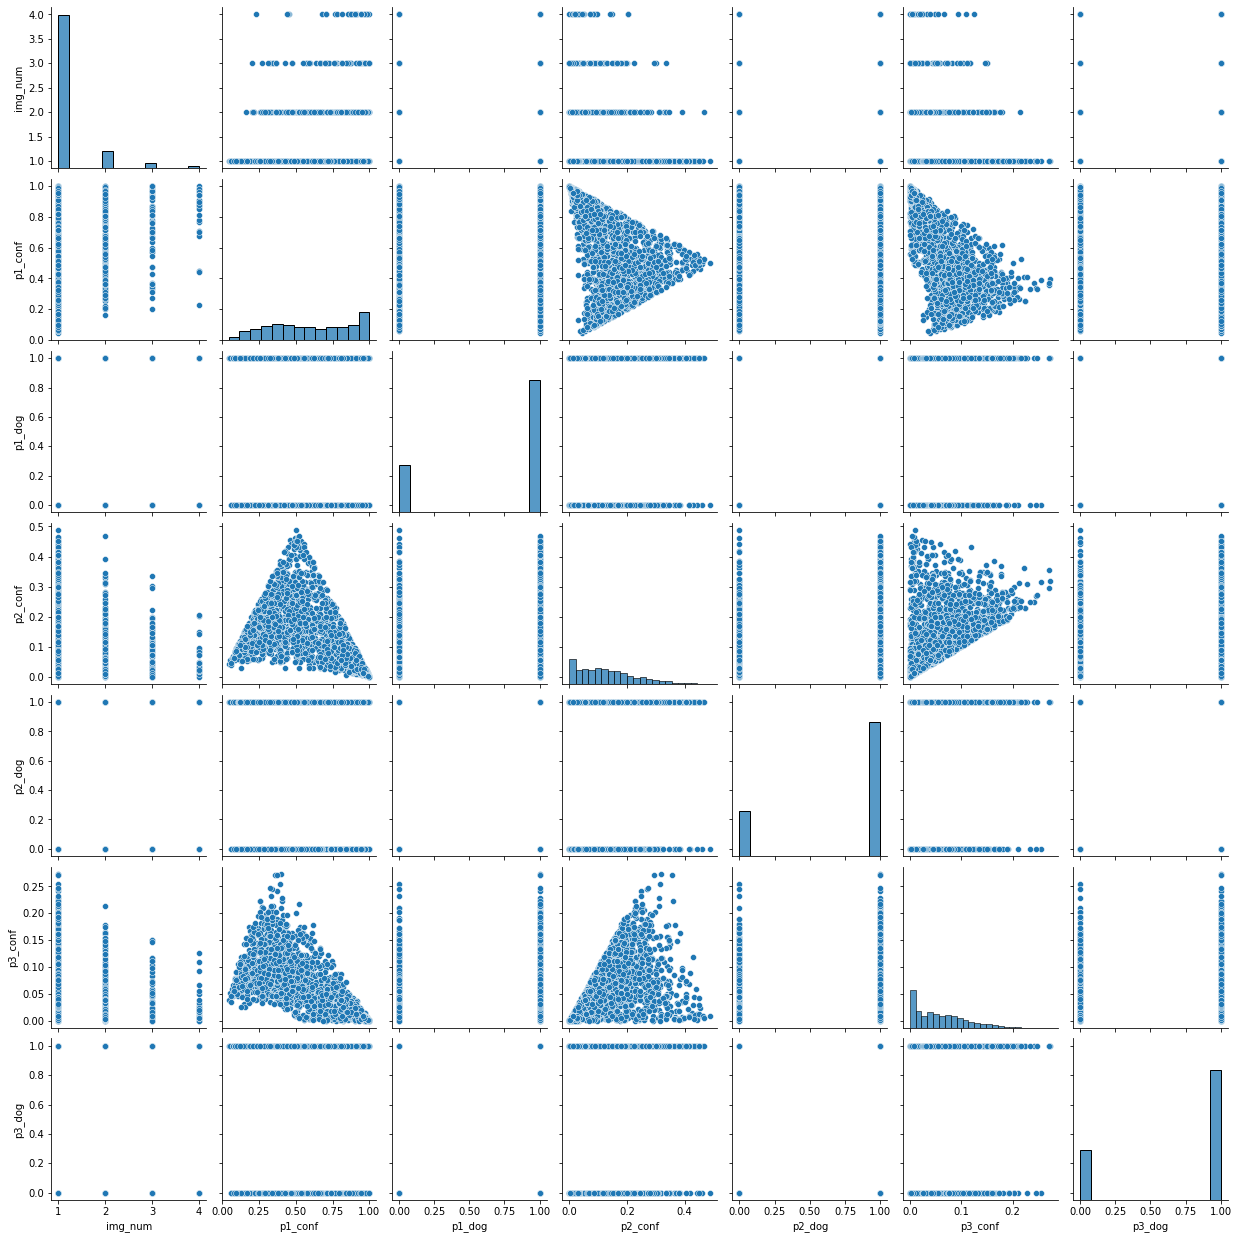

In [34]:
sns.pairplot(img_predictions.set_index("tweet_id"));

In [35]:
tweet_json_df.shape

(2354, 3)

In [37]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [38]:
tweet_json_df.describe()


,tweet_id,retweet_count,favorite_count
count,2.35e+03,2354.00,2354.00
mean,7.43e+17,3164.80,8080.97
std,6.85e+16,5284.77,11814.77
min,6.66e+17,0.00,0.00
25%,6.78e+17,624.50,1415.00
50%,7.19e+17,1473.50,3603.50
75%,7.99e+17,3652.00,10122.25
max,8.92e+17,79515.00,132810.00


### Quality issues

1. The timestamp and retweeted_status_timestamp is not recognized as datetime

2. Some record in the twitter-archive are retweeted

3. some of the missing records are not descriptive enough

4. The doggo, floofer, pupper and poppo columns in the twitter-archive can lead to redundancy

5. Some ratings are not properly extracted and correctly formatted

6. Correcting the tweetid data type

7. Extracting URL address from source

8. Some of the dog’s name are not correctly extracted for instance there are names like Goose, General, Mo, this, unacceptable etc.


### Tidiness issues
1. The dog stage are provided in four different columns under the name doggo, floofer, pupper and puppo rather they should be merged into one column

2. Information about the tweet is provided in three different data hence it should be merged into one single dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [7]:
# Make copies of original pieces of data
twitter_arc_copy = twitter_archive_enhanced.copy()
img_preds_copy = img_predictions.copy()
tweet_json_df_copy = tweet_json_df.copy()

### Issue #1:

#### Define: Converting timestamp and retweeted_status_timestamp to datetime

#### Code

In [8]:
twitter_arc_copy["timestamp"] = pd.to_datetime(twitter_arc_copy["timestamp"])
twitter_arc_copy["retweeted_status_timestamp"] = pd.to_datetime(
    twitter_arc_copy["retweeted_status_timestamp"])

#### Test

In [9]:
# Before the convertion
twitter_archive_enhanced[["timestamp", "retweeted_status_timestamp"]].dtypes


timestamp                     object
retweeted_status_timestamp    object
dtype: object

In [10]:
# After convertion
twitter_arc_copy[["timestamp", "retweeted_status_timestamp"]].dtypes


timestamp                     datetime64[ns, UTC]
retweeted_status_timestamp    datetime64[ns, UTC]
dtype: object

### Issue #2:

#### Define: Removing the retweeted rows

#### Code

In [12]:
# Removing the retweeted row
twitter_arc_copy = twitter_arc_copy[(twitter_arc_copy["retweeted_status_user_id"].isna())]

#### Test

In [13]:
twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [14]:
twitter_arc_copy.isna().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

### Issue #3:

#### replacing nan in the expanded urls with a more descriptive information

#### Code

In [15]:
twitter_arc_copy["expanded_urls"].fillna("Not Provide", inplace=True)


#### Test

In [16]:
print("Number of missing values in expanded url before cleaning {}".format(
    twitter_archive_enhanced["expanded_urls"].isna().sum()))
print("Number of missing values  in expanded url after cleaning {}".format(
    twitter_arc_copy["expanded_urls"].isna().sum()))


Number of missing values in expanded url before cleaning 59
Number of missing values  in expanded url after cleaning 0


### Issue #4:

#### Define: formating doggo, floofer, pupper and puppo in a more human and machine understandable way and merging it into one column (stage)

#### Code

In [17]:
# Converting the none string into and empty string
twitter_arc_copy[["doggo", "floofer", "pupper", "puppo"]] = (twitter_arc_copy[["doggo", "floofer", "pupper", "puppo"]]
                                                             .replace("None", ""))


In [18]:
# Creating a new column stage which is the concat of doggo, floofer, pupper and puppo
twitter_arc_copy["stage"] = twitter_arc_copy["doggo"] + twitter_arc_copy["floofer"] + twitter_arc_copy["pupper"] + twitter_arc_copy["puppo"] 


In [24]:
# Reformating the stage
twitter_arc_copy["stage"] = twitter_arc_copy["stage"].str.replace("doggopupper", "doggo, pupper")
twitter_arc_copy["stage"] = twitter_arc_copy["stage"].str.replace("doggopuppo", "doggo, puppo")
twitter_arc_copy["stage"] = twitter_arc_copy["stage"].str.replace("doggofloofer", "doggo, floofer")


In [20]:
twitter_arc_copy["stage"].replace("", np.nan, inplace=True)


In [21]:
# dropping doggo, floofer, pupper and puppo to avoid redundancy
twitter_arc_copy.drop(
    columns=["doggo", "floofer", "puppo", "pupper"], inplace=True)


#### Test

In [25]:
# Before the converting the none to empty string
twitter_archive_enhanced["doggo"].unique()


array(['None', 'doggo'], dtype=object)

In [26]:
# Before formatting stage
twitter_arc_copy["stage"].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [27]:
# confirming that doggo, pupper, floofer and puppo columns has been removed
twitter_arc_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

### Issue #5:

#### Code

#### Some rating are not properly extracted and correctly formatted

In [35]:
twitter_arc_copy[["rating_denominator", "rating_numerator"]] = twitter_arc_copy[["rating_denominator", "rating_numerator"]].astype("float")

In [50]:
twitter_arc_copy[["rating_denominator", "rating_numerator"]].loc[46]

rating_denominator    10.0
rating_numerator      13.0
Name: 46, dtype: float64

#### Test

In [36]:
twitter_arc_copy["rating_denominator"].dtype

dtype('float64')

In [37]:
twitter_arc_copy["rating_numerator"].dtype

dtype('float64')

### Issue #6:

#### Define: Converting the tweet_id to string

#### Code

In [38]:
twitter_arc_copy["tweet_id"] = twitter_arc_copy["tweet_id"].astype("str")
img_preds_copy["tweet_id"] = img_preds_copy["tweet_id"].astype("str")
tweet_json_df_copy["tweet_id"] = tweet_json_df_copy["tweet_id"].astype("str")

#### Test

In [39]:
# Result before formatting formating the rating_numerator and rating_denominator
print(twitter_archive_enhanced["tweet_id"].dtype, img_predictions["tweet_id"].dtype, tweet_json_df["tweet_id"].dtype, sep="\n")


int64
int64
int64


In [40]:
# Result after formatting formating the rating_numerator and rating_denominator
print(twitter_arc_copy["tweet_id"].dtype, img_preds_copy["tweet_id"].dtype, tweet_json_df_copy["tweet_id"].dtype, sep="\n")


object
object
object


### Issue #7:

#### Define: Remove words that does not correspond to name of dog

#### Code

In [41]:
def replacing_incorrect_name(x):
    if x.islower():
        return np.nan
    else:
        return x


In [42]:
twitter_arc_copy["name"] = twitter_arc_copy["name"].apply(
    replacing_incorrect_name)


#### Test

In [43]:
# Checking the names that are not dog names
twitter_archive_enhanced[twitter_archive_enhanced["name"].str.islower()]["name"]


22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

In [44]:
# Checking the index where the names are not dog name
index = twitter_arc_copy[twitter_arc_copy["name"].isna()]["name"].index
twitter_arc_copy["name"].loc[index]

22      NaN
56      NaN
169     NaN
193     NaN
335     NaN
       ... 
2349    NaN
2350    NaN
2352    NaN
2353    NaN
2354    NaN
Name: name, Length: 104, dtype: object

### Issue 8:

#### Define: Extracting url address from source

#### Code

In [45]:
twitter_arc_copy["source"] = twitter_arc_copy["source"].str.extract(r"(ht.*\" )")[0].str.replace("\" ", "")


#### Test

In [46]:
# Result after formatting formating the rating_numerator and rating_denominator
twitter_archive_enhanced["source"].unique()


array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [149]:
twitter_archive_enhanced["source"].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [47]:
twitter_arc_copy["source"].unique()

array(['http://twitter.com/download/iphone', 'http://twitter.com',
       'http://vine.co', 'https://about.twitter.com/products/tweetdeck'],
      dtype=object)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
df = pd.merge(left=twitter_arc_copy, right=img_preds_copy, how="inner", on="tweet_id")
df = pd.merge(left=df, right=tweet_json_df_copy, how="inner", on="tweet_id")
df.to_csv("twitter_archive_master.csv", index=False)
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,http://twitter.com/downloa...,This is Phineas. He's a my...,NaN,NaN,NaT,https://twitter.com/dog_ra...,...,0.10,False,bagel,0.09,False,banana,0.08,False,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,http://twitter.com/downloa...,This is Tilly. She's just ...,NaN,NaN,NaT,https://twitter.com/dog_ra...,...,0.32,True,Pekinese,0.09,True,papillon,0.07,True,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,http://twitter.com/downloa...,This is Archie. He is a ra...,NaN,NaN,NaT,https://twitter.com/dog_ra...,...,0.72,True,malamute,0.08,True,kelpie,0.03,True,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,http://twitter.com/downloa...,This is Darla. She commenc...,NaN,NaN,NaT,https://twitter.com/dog_ra...,...,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,http://twitter.com/downloa...,This is Franklin. He would...,NaN,NaN,NaT,https://twitter.com/dog_ra...,...,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True,9774,41048


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [152]:
df[["p1_conf", "p2_conf", "p3_conf"]].aggregate({"p1_conf": [np.var, np.std, np.mean, np.median], "p2_conf": [
                                                np.var, np.std, np.mean, np.median], "p3_conf": [np.var, np.std, np.mean, np.median]}).T


,var,std,mean,median
p1_conf,7.35e-02,0.27,0.59,0.59
p2_conf,1.01e-02,0.10,0.13,0.12
p3_conf,2.59e-03,0.05,0.06,0.05


In [153]:
df["p1"].value_counts(ascending=False).head(10)


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
cocker_spaniel         30
Name: p1, dtype: int64

In [154]:
df["p2"].value_counts(ascending=False).head(10)


Labrador_retriever          104
golden_retriever             92
Cardigan                     73
Chihuahua                    44
Pomeranian                   42
Chesapeake_Bay_retriever     41
French_bulldog               41
toy_poodle                   37
cocker_spaniel               34
miniature_poodle             33
Name: p2, dtype: int64

### Insights:
1. Among the most highly predicted dog include the golden retriever and Labrador retriever

2. Of all prediction p1 seems to perform better as it prediction falls which within 0.4 - 0.8 which is followed by p2 and then p3

3.

### Visualization

Text(0.5, 1.0, 'Variance in Prediction')

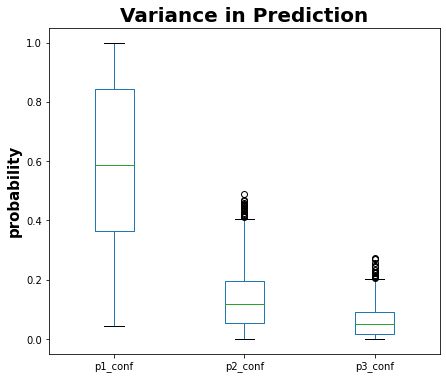

In [155]:
df[["p1_conf", "p2_conf", "p3_conf"]].boxplot(figsize=(7, 6))
plt.grid(False)
plt.ylabel("probability", size=15, weight="bold")
plt.title("Variance in Prediction", size=20, weight="bold")
